## step-01, installing dependencies

In [1]:
pip install tensorflow==2.10.0 tensorflow-gpu==2.10.0 opencv-python matplotlib


In [2]:
pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.7
fonttools                    4.49.0
gast                         0.4.0
google-auth                  2.28.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.62.0
h5py                         3.10.0
idna                         3.6
importlib_metadata           7.0.2
ipykernel                    6.29.3
ipython                      8.22.2
jedi  

In [23]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [5]:
os.listdir #to show all content insiade a folder


<function nt.listdir(path=None)>

In [6]:
#avoid OOM errors by setting GPU memory Consumption Growth

gpus=tf.config.experimental.list_physical_devices('GPU') #we are taking all the gpu available in the memory, used to check all the availabl edevices in the system
for gpu in gpus: #
    tf.config.experimental.set_memory_growth(gpu, True) #limiting memory usage

### 1.2 removing dodgy images!!

In [10]:
import cv2
import imghdr

In [11]:
data_dir='data' #pointing to the data folder

In [12]:
os.listdir(data_dir) #shows the content of data folder


['adhar card', 'pan card']

In [14]:
os.listdir(os.path.join(data_dir, 'adhar card')) #will return every image insiade that folder

['0521_adhar_jpg.rf.079056603f72bdea84628f1a84898277.jpg',
 '0521_adhar_jpg.rf.3201d7dabdab7612868fd71c80bd0fb9.jpg',
 '0521_adhar_jpg.rf.42eac27fc273a0fa1c896f8a22bf4f23.jpg',
 '0521_adhar_jpg.rf.4d212715b042c4b78c7e7171eb3d535b.jpg',
 '0521_adhar_jpg.rf.57f806c05eb65977452e90ec226d4ca7.jpg',
 '0521_adhar_jpg.rf.5a3ad096463140c03836a93c1d30a5f5.jpg',
 '0521_adhar_jpg.rf.64698393242e6b1fff3aa729bb463fd0.jpg',
 '0521_adhar_jpg.rf.6ef9325ccbc2e450f771aa6cb527eae0.jpg',
 '0521_adhar_jpg.rf.7818abd1a7a52afcc02fa76eb60cbe79.jpg',
 '0521_adhar_jpg.rf.9337593de6d378bea2fc09037f43e56d.jpg',
 '0521_adhar_jpg.rf.9b6b1180f192949337d6621140ffdadb.jpg',
 '0521_adhar_jpg.rf.c4677bec18ecb1b5ab7e354fdaebdbe9.jpg',
 '0521_adhar_jpg.rf.ce670466d96adecd21915cac65b6704c.jpg',
 '0521_adhar_jpg.rf.d03f80377473eca98eb4cbc8f59dcc78.jpg',
 '06a0686f91bed47d1f4873e4d104442c_jpg.rf.2e9cc0fefa1c5184b3452abd29d665bc.jpg',
 '06a0686f91bed47d1f4873e4d104442c_jpg.rf.34a8e5f28a5ad507cf9dd696c12657ea.jpg',
 '06a0686f91

In [15]:
image_exts=['jpeg', 'jpg', 'bmp', 'png']

In [17]:
image_exts[2]

'bmp'

In [21]:
img=cv2.imread(os.path.join('data', 'pan card', '1_61d12c112993d-PNG_jpg.rf.83d0180bf2860d1b36d3ed140b29ee8d.jpg'))

In [22]:
img.shape

(640, 640, 3)

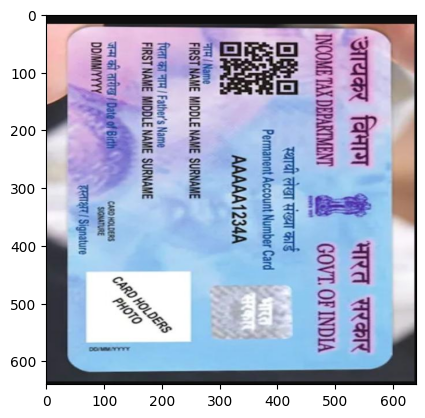

In [25]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image) #we are gettin each and every image
        try:
            img=cv2.imread(image_path) #to open a image
            tip=imghdr(image_path)
            if tip not in image_exts:
                print("img not found {}".format(image_path))
                os.remove(image_path) #deleet file
        except Exception as e:
            print('issue with image {}'.format(image_path))

issue with image data\adhar card\0521_adhar_jpg.rf.079056603f72bdea84628f1a84898277.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.3201d7dabdab7612868fd71c80bd0fb9.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.42eac27fc273a0fa1c896f8a22bf4f23.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.4d212715b042c4b78c7e7171eb3d535b.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.57f806c05eb65977452e90ec226d4ca7.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.5a3ad096463140c03836a93c1d30a5f5.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.64698393242e6b1fff3aa729bb463fd0.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.6ef9325ccbc2e450f771aa6cb527eae0.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.7818abd1a7a52afcc02fa76eb60cbe79.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.9337593de6d378bea2fc09037f43e56d.jpg
issue with image data\adhar card\0521_adhar_jpg.rf.9b6b1180f192949337d6621140ffdadb.jpg
issue with image data\adhar card

### 1.3, load data

In [29]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [35]:
import numpy as np

In [32]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 1033 files belonging to 2 classes.


In [36]:
data_iterator= data.as_numpy_iterator() #acces data m

In [38]:
batch=data_iterator.next()

In [40]:
len(batch)

2

In [43]:
batch[1]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

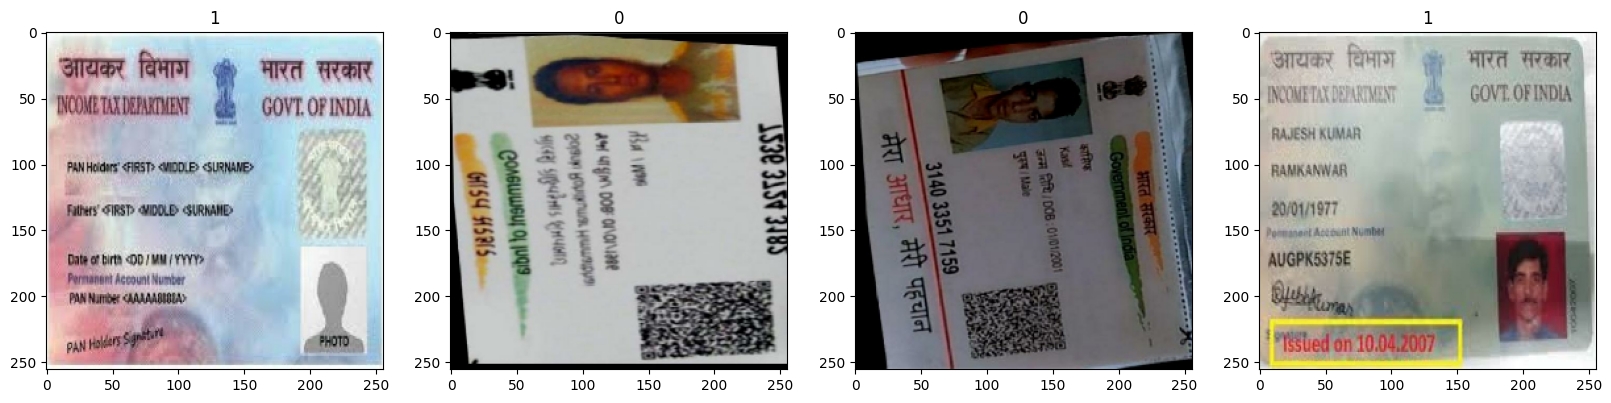

In [45]:
fig, ax=plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [49]:
scaled=batch[0]/255
scaled.max()

1.0

### pre=process data

## scale data

In [ ]:
data= data.map(lambda x, y: (x/255, y))

In [51]:
data.as_numpy_iterator().next()[0].max()

255.0

## split data

In [52]:
len(data)

33

In [53]:
train_size= int(len(data)*.7)
val_size= int(len(data)*.2)+1
test_size= int(len(data)*.1)+1



In [55]:
train_size+val_size+test_size

32

In [56]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [57]:
len(test)

3

## DEEP LEARNING MODEL

In [58]:
from tensorflow.keras.models import Sequential # un, used to define input and output in model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten, Dropout

In [59]:
model=Sequential()

In [61]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #single output





In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## train

In [65]:
logdir='logs'

In [66]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
hist= model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 25s 312ms/step - loss: 15.4899 - accuracy: 0.7867 - val_loss: 0.2827 - val_accuracy: 0.9271
Epoch 2/20
23/23 [==============================] - 4s 162ms/step - loss: 0.1366 - accuracy: 0.9715 - val_loss: 0.1472 - val_accuracy: 0.9531
Epoch 3/20
23/23 [==============================] - 4s 157ms/step - loss: 0.1605 - accuracy: 0.9688 - val_loss: 0.1932 - val_accuracy: 0.9688
Epoch 4/20
23/23 [==============================] - 4s 155ms/step - loss: 0.0982 - accuracy: 0.9851 - val_loss: 0.0684 - val_accuracy: 0.9844
Epoch 5/20
23/23 [==============================] - 4s 155ms/step - loss: 0.0368 - accuracy: 0.9905 - val_loss: 0.0928 - val_accuracy: 0.9688
Epoch 6/20
23/23 [==============================] - 4s 151ms/step - loss: 0.0929 - accuracy: 0.9837 - val_loss: 0.1058 - val_accuracy: 0.9635
Epoch 7/20
23/23 [==============================] - 4s 152ms/step - loss: 0.1458 - accuracy: 0.9660 - val_loss: 0.0454 - val_accuracy: 0.9844
Epoc

In [69]:
hist.history

{'loss': [15.4898681640625,
  0.13657309114933014,
  0.16053669154644012,
  0.09815313667058945,
  0.036821965128183365,
  0.09285105019807816,
  0.14581570029258728,
  0.06193998083472252,
  0.028884131461381912,
  0.01720159500837326,
  0.014369318261742592,
  0.007634155917912722,
  0.08216630667448044,
  0.13018330931663513,
  0.05253363773226738,
  0.01916096918284893,
  0.011312630027532578,
  0.08846892416477203,
  0.1442539095878601,
  0.10882435739040375],
 'accuracy': [0.7866848111152649,
  0.9714673757553101,
  0.96875,
  0.9850543737411499,
  0.99048912525177,
  0.9836956262588501,
  0.9660326242446899,
  0.9836956262588501,
  0.9945651888847351,
  0.9932065010070801,
  0.9959239363670349,
  0.998641312122345,
  0.979619562625885,
  0.976902186870575,
  0.9959239363670349,
  0.9959239363670349,
  0.9959239363670349,
  0.9850543737411499,
  0.9755434989929199,
  0.976902186870575],
 'val_loss': [0.28269436955451965,
  0.1472329944372177,
  0.19317905604839325,
  0.0684253200

### 3.3, plot performance

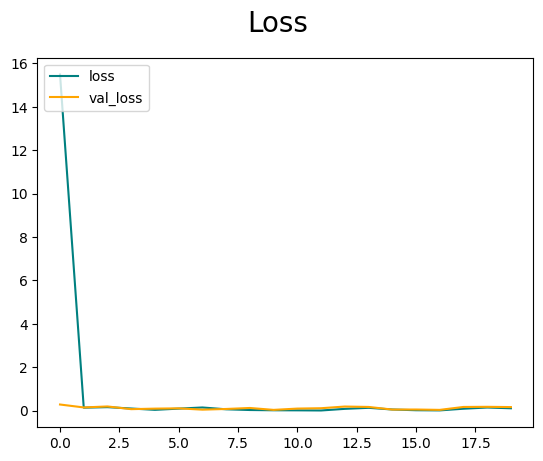

In [73]:
fig= plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

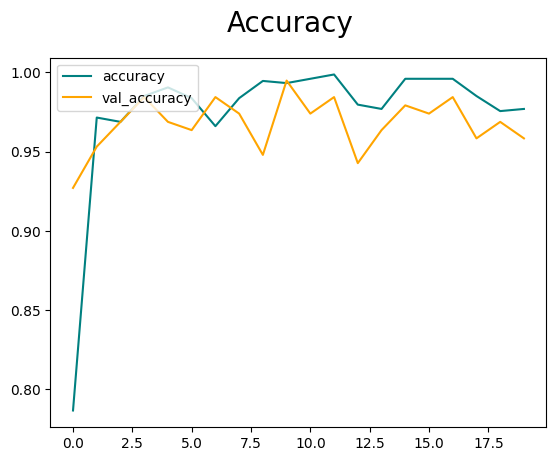

In [72]:
fig= plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


## 4.4, evaluating performance

In [74]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [76]:
len(test)

3

In [77]:
for batch in test.as_numpy_iterator():
    X,y =batch
    yhat=model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 58ms/step


In [82]:
print(f'Precison:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precison:1.0, Recall:0.9272727370262146, Accuracy:0.9583333134651184


### Test

In [83]:
import cv2

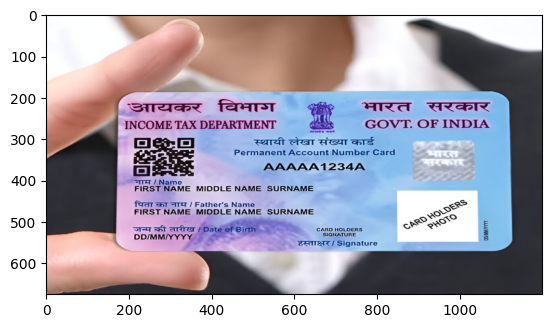

In [124]:
img=cv2.imread('p2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

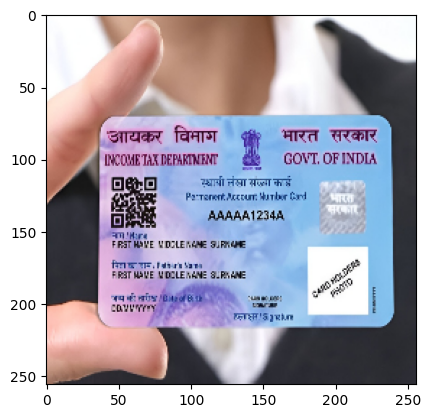

In [125]:
resize = tf.image.resize(img, (256, 256))
rgb_img = cv2.cvtColor(resize.numpy().astype(np.uint8), cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()


In [126]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [127]:
yhat= model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


In [128]:
yhat

array([[0.7075274]], dtype=float32)

In [130]:
model_version=2
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/2\assets


INFO:tensorflow:Assets written to: ./models/2\assets


In [132]:
if yhat>0.5:
    print(f'predicted class is a pan card')
else:
    print(f'class is a adhar card')

predicted class is a pan card
